In [39]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [40]:
term = "finance"

# Download stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt_tab')

# Define a function to preprocess text
def preprocess_text(text):
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text
    words = word_tokenize(text, "english")
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    stop_words.update({term.lower(), "htmlhtml", "pdfpdf", "bookb", "citationc"})
    words = [word for word in words if word not in stop_words]
    return words

[nltk_data] Downloading package stopwords to /home/suna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/suna/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [41]:
# Read the CSV file into a DataFrame
file_path = f'./{term}_google_scholar_results.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,title,url,citations
0,"Ai in finance: challenges, techniques, and opp...",https://dl.acm.org/doi/abs/10.1145/3502289,0
1,Green finance research around the world: a rev...,https://www.inderscienceonline.com/doi/abs/10....,0
2,Climate finance,https://www.annualreviews.org/content/journals...,0
3,[CITATION][C] DeFi and the Future of Finance,https://books.google.com/books?hl=en&lr=&id=YC...,337
4,[HTML][HTML] ChatGPT for (finance) research: T...,https://www.sciencedirect.com/science/article/...,0


In [42]:
# Preprocess the text data
documents = df['title'].values

# Apply the preprocessing function to each document
documents = [preprocess_text(doc) for doc in documents]

# If preprocess_text returns a list of tokens, you might want to join them back into a single string
documents = [' '.join(doc) if isinstance(doc, list) else doc for doc in documents]

In [43]:
documents

['ai challenges techniques opportunities',
 'green research around world review literature',
 'climate',
 'defi future',
 'chatgpt research bananarama conjecture',
 'technology decentralized defi',
 'sustainable',
 'digital corporate esg',
 'chatgpt applications challenges solutions',
 'big data',
 'effect digital marketing digital digital payment performance indonesian smes',
 'bloomberggpt large language model',
 'defi decentralized financean introduction overview',
 'keynes motive',
 'greening',
 'introduction decentralized defi',
 'effect digital financial stability',
 'invesitigation industry risk awareness model digital economic growth',
 'count countlike data',
 'experience effects foundations applications future directions',
 'digital widened income gap',
 'digital green growth china appraising inclusive digital using web crawler technology big data',
 'presidential address corporate reality',
 'mastering money cycleleveraging regulation policies personal management',
 'tokenba

In [44]:
# Convert the text data to a matrix of token counts
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X)

# Display the top words in each topic
n_top_words = 15
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

Topic #0:
digital green energy development china renewable financial corporate impact evidence financing efficiency risk sustainable industry

Topic #1:
decentralized defi research esg impact corporate review sustainable social introduction challenges enterprises digital manufacturing regional

Topic #2:
digital green evidence china innovation development promote inclusive technology corporate energy perspective cities performance enterprises

Topic #3:
green digital analysis empirical innovation international spatial economics technology chinas review emissions overview efficiency strategy

Topic #4:
green evidence climate review china renewable energy role investment management bibliometric empirical public model goals

Topic #5:
intelligence artificial green review future bibliometric development financial literature explainable promise business regional analysis defi

Topic #6:
digital green carbon world gap environmental impact crowdfunding learning inclusive income corporate rese

In [45]:
# Convert the text data to TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Apply K-Means clustering
num_clusters = 10
km = KMeans(n_clusters=num_clusters, random_state=42)
km.fit(tfidf_matrix)

# Assign each document to a cluster
clusters = km.labels_.tolist()

# Add the cluster assignments to the DataFrame
df['cluster'] = clusters

# Show the top five citations of each cluster
top_citations = df.groupby('cluster')['citations'].nlargest(3).reset_index(level=0, drop=True)
df.loc[top_citations.index].sort_values(by=['cluster', 'citations'], ascending=[True, False])

,title,url,citations,cluster
113,Impacts of green finance on green innovation: ...,https://www.sciencedirect.com/science/article/...,230,0
74,Spatial pattern and the development of green f...,https://www.sciencedirect.com/science/article/...,52,0
130,[HTML][HTML] Development strategy and the MSME...,https://www.sciencedirect.com/science/article/...,0,0
187,[BOOK][B] Essentials of health care finance,https://books.google.com/books?hl=en&lr=&id=CI...,407,1
106,An empirical analysis of the coupling and coor...,https://www.sciencedirect.com/science/article/...,190,1
13,Keynes' finance motive,https://www.elgaronline.com/edcollchap/book/97...,88,1
134,"Digital finance, green technological innovatio...",https://www.sciencedirect.com/science/article/...,573,2
35,"Environmental decentralization, digital financ...",https://www.sciencedirect.com/science/article/...,524,2
60,How does digital finance influence green techn...,https://www.sciencedirect.com/science/article/...,349,2
3,[CITATION][C] DeFi and the Future of Finance,https://books.google.com/books?hl=en&lr=&id=YC...,337,3


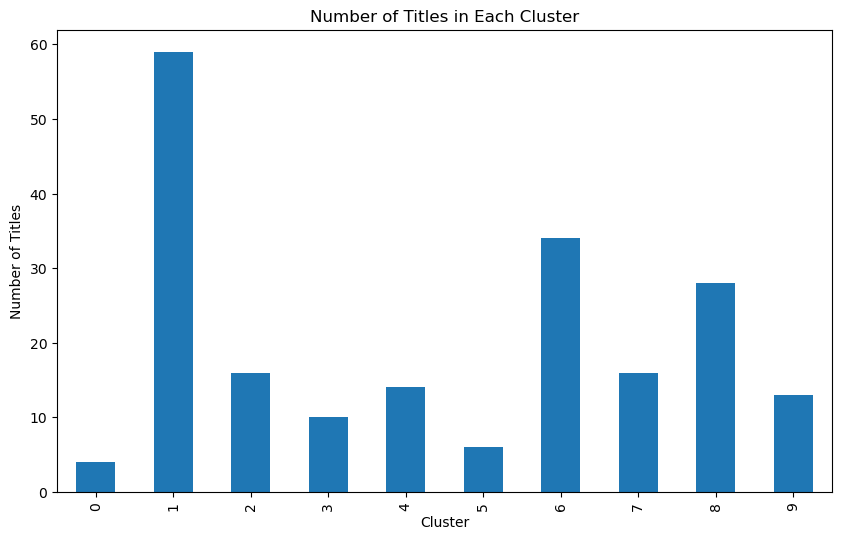

In [46]:
# Bar chart for the number of titles in each cluster
cluster_counts = df['cluster'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Number of Titles')
plt.title('Number of Titles in Each Cluster')
plt.show()

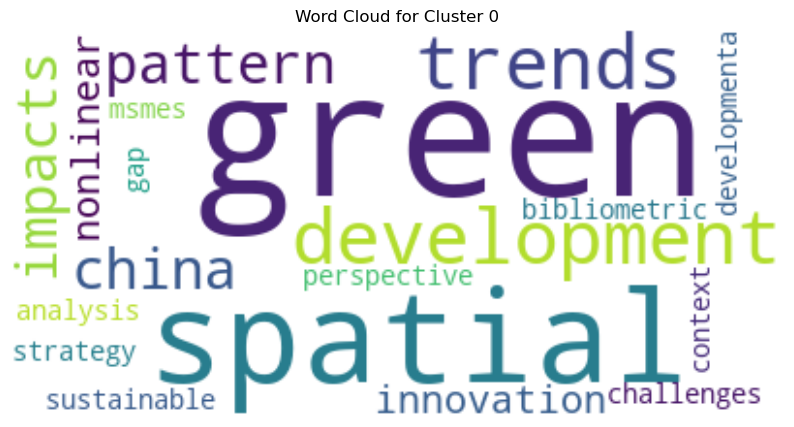

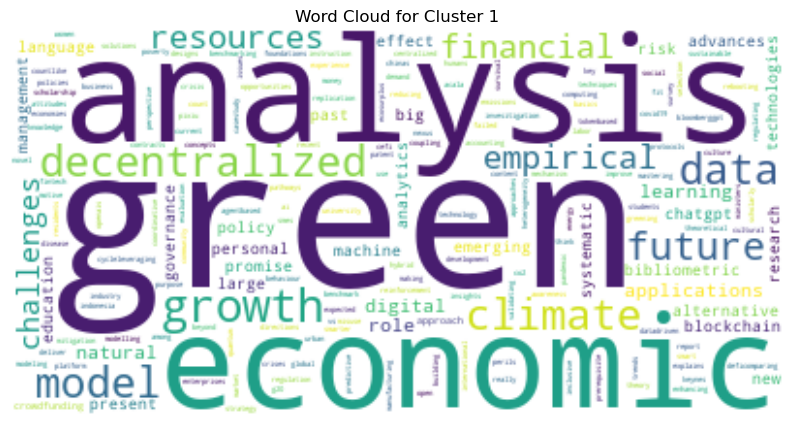

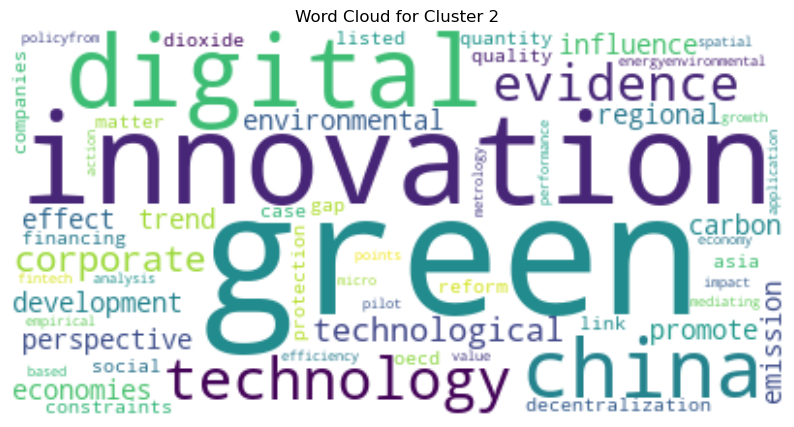

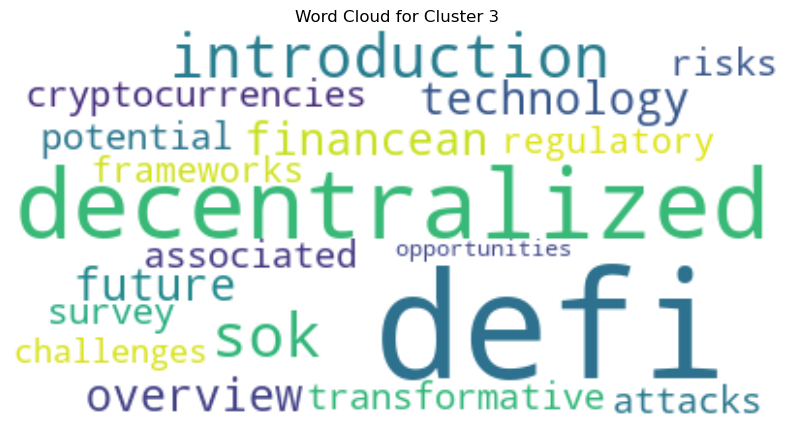

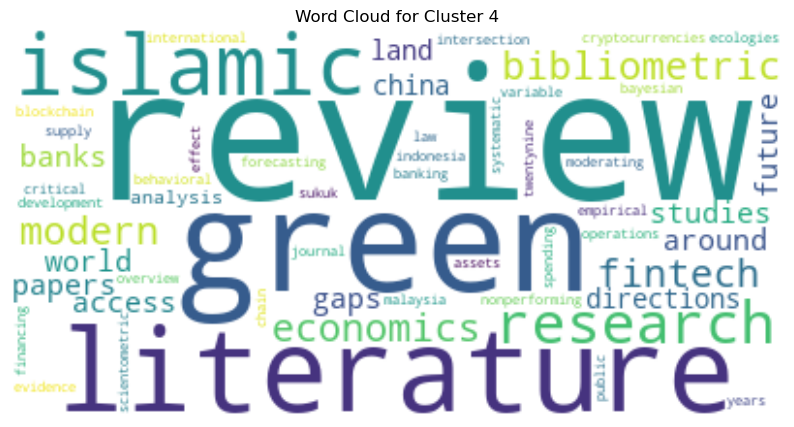

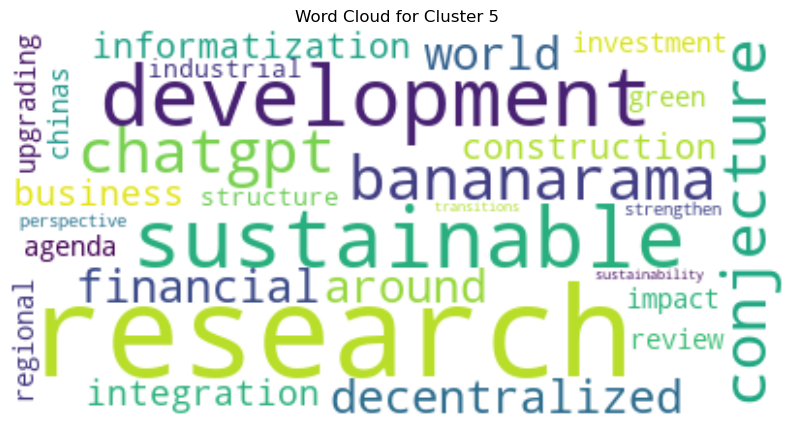

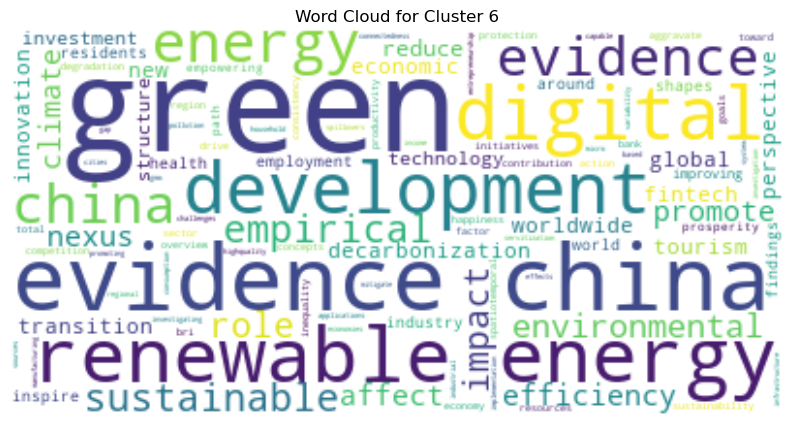

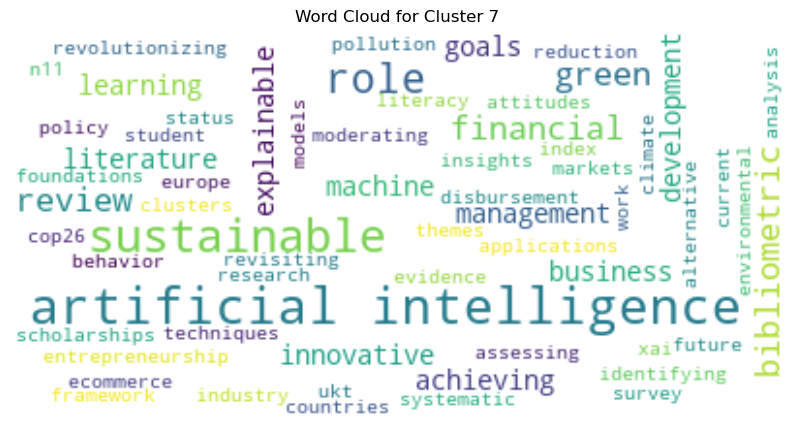

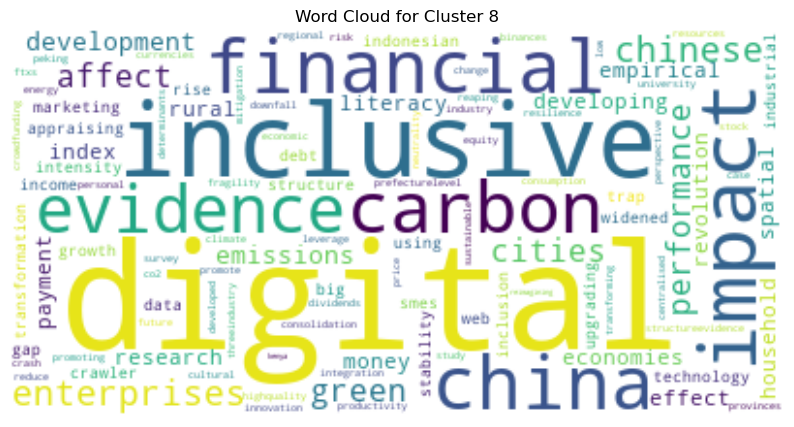

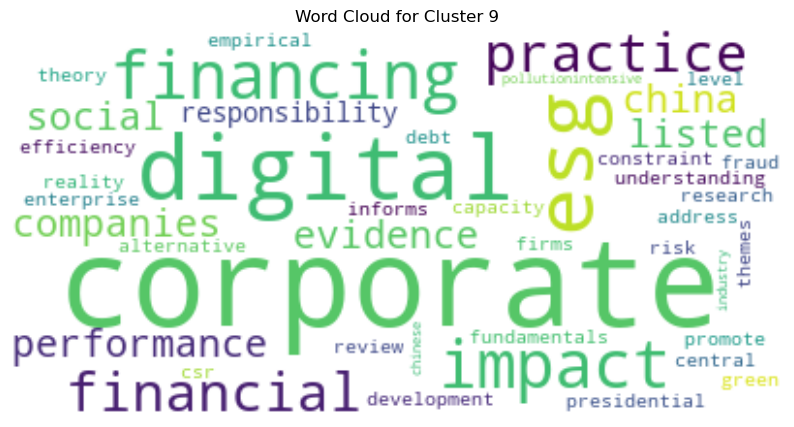

In [47]:
# Assuming df['Cluster'] already exists and documents is a list of strings
df_documents = pd.DataFrame({'Document': documents, 'Cluster': df['cluster']})

# Generate word clouds for each cluster
for cluster in range(num_clusters):
    cluster_docs = df_documents[df_documents['Cluster'] == cluster]['Document']
    cluster_words = ' '.join(cluster_docs)
    wordcloud = WordCloud(stopwords={'english', 'finance'}, background_color='white').generate(cluster_words)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster}')
    plt.show()

In [48]:
# Save the updated DataFrame with cluster information to a new CSV file
df.to_csv(f'./{term}_google_scholar_results_v2.csv', index=False)